In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

from smc.prior import StarPrior
from smc.images import ImageModel

Generate an image:

In [2]:
torch.manual_seed(1)

image_dim = 16
true_psf_stdev = 1.0
true_background = 300
true_flux_mean = 1300
true_flux_stdev = 250

TruePrior = StarPrior(max_objects = 20,
                      image_height = image_dim,
                      image_width = image_dim,
                      flux_mean = true_flux_mean,
                      flux_stdev = true_flux_stdev,
                      pad = 2)

TrueImageModel = ImageModel(image_height = image_dim,
                            image_width = image_dim,
                            psf_stdev = true_psf_stdev,
                            background = true_background)

true_counts, true_locs, true_fluxes, images = TrueImageModel.generate(Prior = TruePrior,
                                                                      num_images = 100)

mask = true_counts >= 10
images = images[mask]
image_index = torch.randint(low=0, high=mask.sum(), size=[1])

In [3]:
image_dim = images.shape[1]

grid_interval = image_dim // 2
pad = 2

cmap = 'gray'
linewidth = 6
linestyle = 'dashed'
pad_color1 = 'steelblue'
pad_color2 = 'burlywood'
pad_color3 = 'indianred'
pad_color4 = 'mediumseagreen'

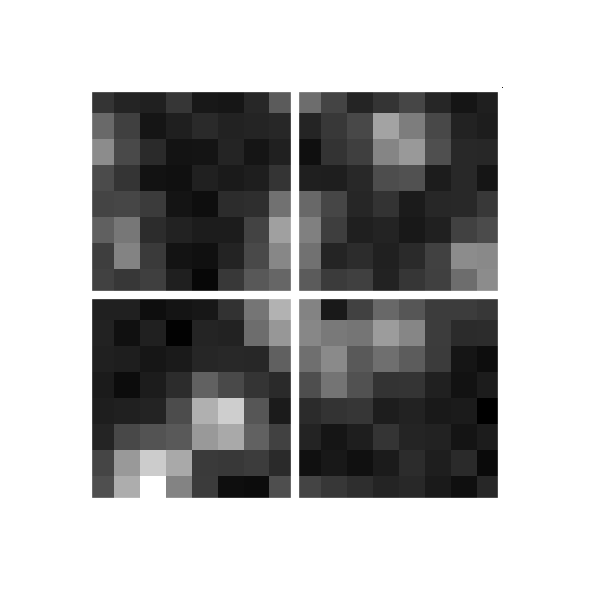

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index].squeeze(), cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,1,2]],
              ymin = 0 * grid_interval - 0.5, ymax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,1,2]],
              xmin = 0 * grid_interval - 0.5, xmax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)

# transparent padding (for size consistency)
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth, alpha = 0)

fig.tight_layout()

fig.savefig('figures/figure1a.png', dpi = 250, transparent = True)

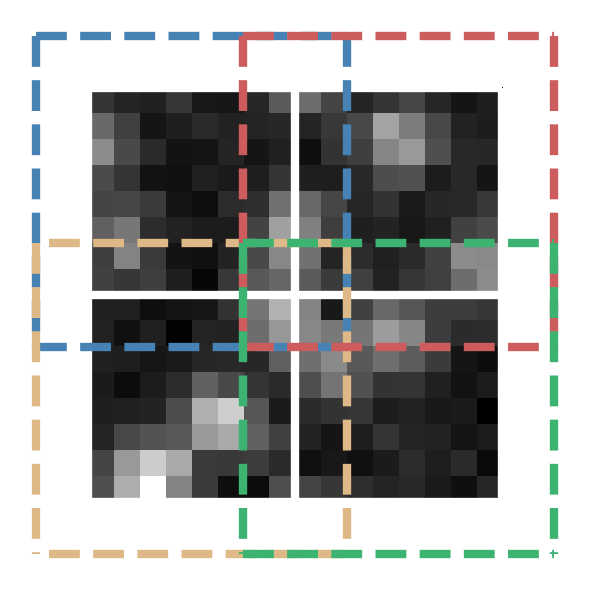

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index].squeeze(), cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,1,2]],
              ymin = 0 * grid_interval - 0.5, ymax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,1,2]],
              xmin = 0 * grid_interval - 0.5, xmax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)

# quadrant 1
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 1 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad - 0.5, xmax = 1 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)

# quadrant 2
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = 1 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad, xmax = 1 * grid_interval + pad - 0.5,
              color = pad_color2, linestyles = linestyle, linewidth = linewidth)

# quadrant 3
_ = ax.vlines(x = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 1 * grid_interval + pad - 0.5,
              color = pad_color3, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              xmin = 1 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color3, linestyles = linestyle, linewidth = linewidth)

# quadrant 4
_ = ax.vlines(x = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 1 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color4, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 1 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color4, linestyles = linestyle, linewidth = linewidth)

fig.tight_layout()

fig.savefig('figures/figure1b.png', dpi = 250, transparent = True)

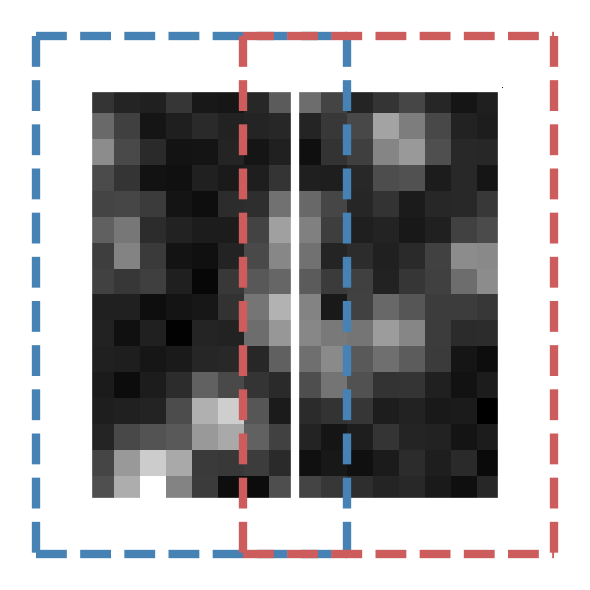

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index].squeeze(), cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,1,2]],
              ymin = 0 * grid_interval - 0.5, ymax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,2]],
              xmin = 0 * grid_interval - 0.5, xmax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)

# half 1
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 1 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad - 0.5, xmax = 1 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)

# half 2
_ = ax.vlines(x = [1 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color3, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 1 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color3, linestyles = linestyle, linewidth = linewidth)

fig.tight_layout()

fig.savefig('figures/figure1c.png', dpi = 250, transparent = True)

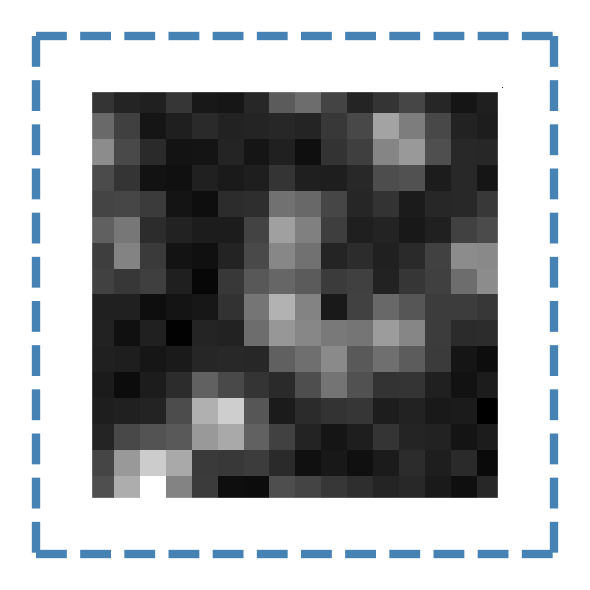

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index].squeeze(), cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# tile borders
_ = ax.vlines(x = [c * grid_interval - 0.5 for c in [0,2]],
              ymin = 0 * grid_interval - 0.5, ymax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)
_ = ax.hlines(y = [c * grid_interval - 0.5 for c in [0,2]],
              xmin = 0 * grid_interval - 0.5, xmax = 2 * grid_interval - 0.5,
              color = 'white', linewidth = linewidth)

# image (with padding)
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth)

fig.tight_layout()

fig.savefig('figures/figure1d.png', dpi = 250, transparent = True)

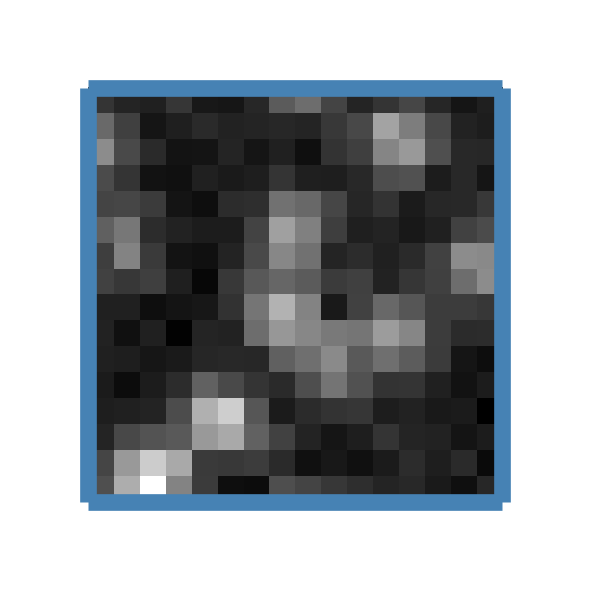

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
img = ax.imshow(images[image_index].squeeze(), cmap = cmap)
_ = ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

# image (no padding)
_ = ax.vlines(x = [0 * grid_interval - 0.5, 2 * grid_interval - 0.5],
              ymin = 0 * grid_interval - 0.5, ymax = 2 * grid_interval - 0.5,
              color = pad_color1, linestyles = 'solid', linewidth = 2*linewidth)
_ = ax.hlines(y = [0 * grid_interval - 0.5, 2 * grid_interval - 0.5],
              xmin = 0 * grid_interval - 0.5, xmax = 2 * grid_interval - 0.5,
              color = pad_color1, linestyles = 'solid', linewidth = 2*linewidth)

# transparent padding (for size consistency)
_ = ax.vlines(x = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              ymin = 0 * grid_interval - pad - 0.5, ymax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth, alpha = 0)
_ = ax.hlines(y = [0 * grid_interval - pad - 0.5, 2 * grid_interval + pad - 0.5],
              xmin = 0 * grid_interval - pad - 0.5, xmax = 2 * grid_interval + pad - 0.5,
              color = pad_color1, linestyles = linestyle, linewidth = linewidth, alpha = 0)

fig.tight_layout()

fig.savefig('figures/figure1e.png', dpi = 250, transparent = True)